In [1]:
?USArrests

USArrests               package:datasets               R Documentation

_V_i_o_l_e_n_t _C_r_i_m_e _R_a_t_e_s _b_y _U_S _S_t_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     This data set contains statistics, in arrests per 100,000
     residents for assault, murder, and rape in each of the 50 US
     states in 1973.  Also given is the percent of the population
     living in urban areas.

_U_s_a_g_e:

     USArrests
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 4 variables.

       [,1]  ‘Murder’    numeric  Murder arrests (per 100,000)  
       [,2]  ‘Assault’   numeric  Assault arrests (per 100,000) 
       [,3]  ‘UrbanPop’  numeric  Percent urban population      
       [,4]  ‘Rape’      numeric  Rape arrests (per 100,000)    
      
_N_o_t_e:

     ‘USArrests’ contains the data as in McNeil's monograph.  For the
     ‘UrbanPop’ percentages, a review of the table (No. 21) in the
     Statistical Abstracts 1975 reveals a transcription error for
     Maryland (and that McNeil used the same “round to even” rule that
     R's ‘round()’ uses), as found by Daniel S Coven (Arizona).

     See the example below on how to correct the error and improve
     accuracy for the ‘<n>.5’ percentages.

_S_o_u_r_c_e:

     World Almanac and Book of facts 1975.  (Crime rates).

     Statistical Abstracts of the United States 1975, p.20, (Urban
     rates), possibly available as
     <https://books.google.ch/books?id=zl9qAAAAMAAJ&pg=PA20>.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

_S_e_e _A_l_s_o:

     The ‘state’ data sets.

_E_x_a_m_p_l_e_s:

     summary(USArrests)
     
     require(graphics)
     pairs(USArrests, panel = panel.smooth, main = "USArrests data")
     
     ## Difference between 'USArrests' and its correction
     USArrests["Maryland", "UrbanPop"] # 67 -- the transcription error
     UA.C <- USArrests
     UA.C["Maryland", "UrbanPop"] <- 76.6
     
     ## also +/- 0.5 to restore the original  <n>.5  percentages
     s5u <- c("Colorado", "Florida", "Mississippi", "Wyoming")
     s5d <- c("Nebraska", "Pennsylvania")
     UA.C[s5u, "UrbanPop"] <- UA.C[s5u, "UrbanPop"] + 0.5
     UA.C[s5d, "UrbanPop"] <- UA.C[s5d, "UrbanPop"] - 0.5
     
     ## ==> UA.C  is now a *C*orrected version of  USArrests

In [2]:
USArrests

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [3]:
# princomp 를 통해 주성분분석 실행
pc1 <- princomp(USArrests, cor=T)
summary(pc1)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

In [6]:
# 각 변수의 평균
pc1$center
# 각 변수의 표준편차
pc1$scale
# 각 변수가 주성분에 기여하는 정도
pc1$loadings

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.311735 82.500075 14.329285  9.272248


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [8]:
# 데이터를 주성분 축으로 변환한 결과
pc1$scores

,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,0.98556588,1.13339238,0.44426879,0.156267145
Alaska,1.95013775,1.07321326,-2.04000333,-0.438583440
Arizona,1.76316354,-0.74595678,-0.05478082,-0.834652924
Arkansas,-0.14142029,1.11979678,-0.11457369,-0.182810896
California,2.52398013,-1.54293399,-0.59855680,-0.341996478
Colorado,1.51456286,-0.98755509,-1.09500699,0.001464887
Connecticut,-1.35864746,-1.08892789,0.64325757,-0.118469414
Delaware,0.04770931,-0.32535892,0.71863294,-0.881977637
Florida,3.01304227,0.03922851,0.57682949,-0.096284752
Georgia,1.63928304,1.27894240,0.34246008,1.076796812


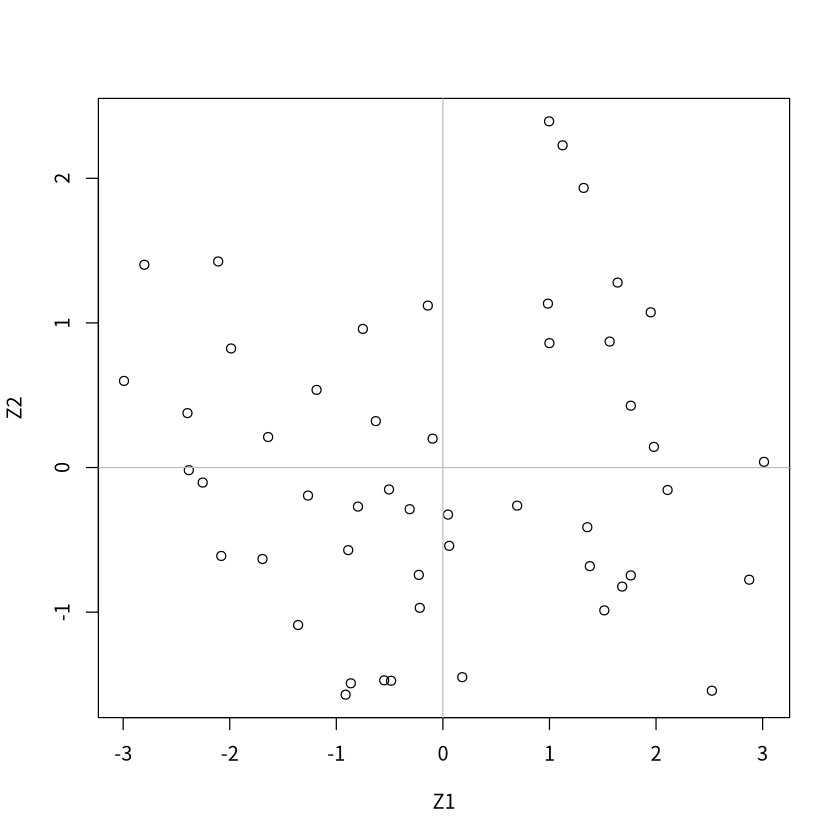

In [9]:
plot(pc1$scores[,1], pc1$scores[,2], xlab="Z1", ylab="Z2")
abline(v=0, h=0, col="gray")

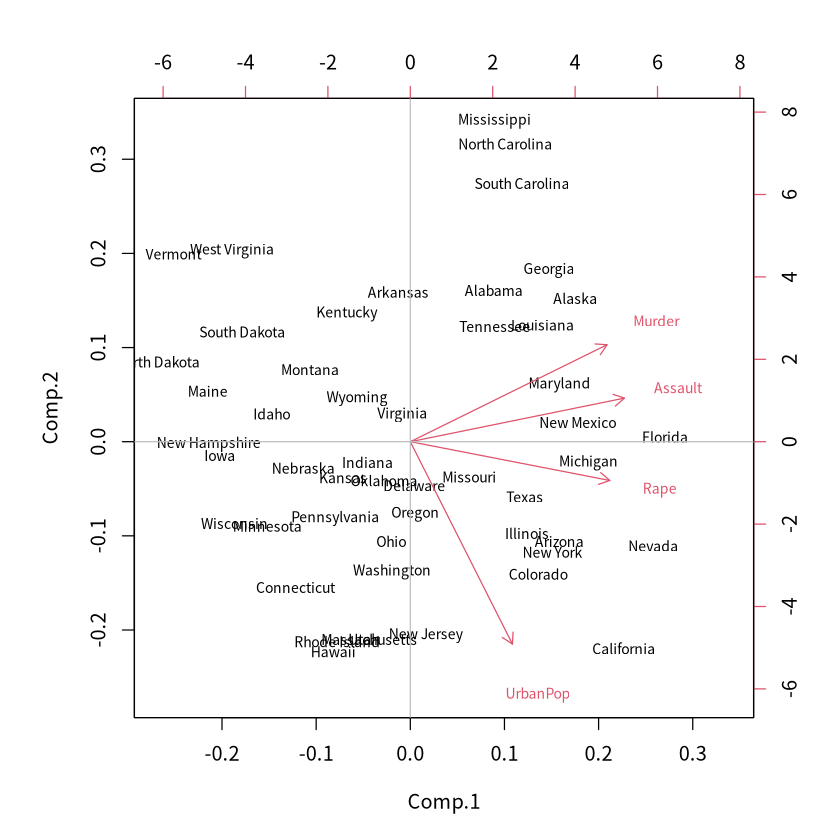

In [10]:
biplot(pc1, cex=0.7)
abline(v=0, h=0, col="gray")